In [116]:
import torch
import torch.nn as nn

In [117]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [118]:
model_name = "prajjwal1/bert-tiny"

In [119]:
# model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [120]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [121]:
# classifier = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer)

In [122]:
# classifier("I am so shocked that you are a criminal")

In [123]:
tokenizer("I")

{'input_ids': [101, 1045, 102], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}

In [124]:
tokenizer("I am a boy")

{'input_ids': [101, 1045, 2572, 1037, 2879, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [125]:
tokenizer("I am a criminal")

{'input_ids': [101, 1045, 2572, 1037, 4735, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [126]:
tokenizer("These are raw vectors, no contextual meaning")

{'input_ids': [101, 2122, 2024, 6315, 19019, 1010, 2053, 6123, 8787, 3574, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [127]:
tokenizer("These are raw vectors, with contextual meaning")

{'input_ids': [101, 2122, 2024, 6315, 19019, 1010, 2007, 6123, 8787, 3574, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [128]:
tokenizer("with")

{'input_ids': [101, 2007, 102], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}

In [129]:
batch = tokenizer("These are raw vectors, without contextual meaning", padding = "max_length", truncation = True, max_length = 32, return_tensors = 'pt')

In [130]:
batch

{'input_ids': tensor([[  101,  2122,  2024,  6315, 19019,  1010,  2302,  6123,  8787,  3574,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])}

In [131]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [132]:
from transformers import AutoModel

In [133]:
mod = AutoModel.from_pretrained(model_name)

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

In [134]:
mod = mod.to(device)

In [135]:
t = mod(**batch.to(device))

In [136]:
batch.input_ids.shape

torch.Size([1, 32])

In [137]:
t.last_hidden_state.shape

torch.Size([1, 32, 128])

In [138]:
sentences = ["These are raw vectors, without contextual meaning", "God is real"]

In [139]:
batch = tokenizer(sentences, padding = "max_length", truncation = True, max_length = 200, return_tensors = 'pt')

In [140]:
t.last_hidden_state.shape

torch.Size([1, 32, 128])

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn

In [142]:
import kagglehub
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

In [143]:
file_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
df = pd.read_csv(file_path)

In [144]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [145]:
df['encoded_senti'] = 0

In [146]:
df.loc[df['sentiment'] == 'positive', 'encoded_senti'] = 1

In [147]:
df

,review,sentiment,encoded_senti
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [148]:
df['encoded_senti'].value_counts()

,count
encoded_senti,
1,25000
0,25000


In [149]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['encoded_senti'], shuffle = True, random_state = 100, test_size = 0.2)

In [150]:
from torch.utils.data import Dataset, DataLoader

In [151]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    ## Expects the input X to be transformer embedded already
    super().__init__()
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, index):
    return self.X[index], self.y[index]

In [215]:
class lstm(nn.Module):
  def __init__(self, inp_emb_dim):
    super().__init__()
    self.lstm_layer = nn.LSTM(inp_emb_dim, 32, dropout = 0.1, batch_first = True)
    self.lin1 = nn.Linear(32, 16)
    self.lin2 = nn.Linear(16, 1)
    self.sig = nn.Sigmoid()
    # self.

  def forward(self, X):
    out = self.lstm_layer(X)
    # print(out[1].shape)
    # out = self.lin1(out[1][1])
    out = self.lin1(out[1][1])
    out = self.lin2(out)
    out = self.sig(out)
    return out

In [153]:
from torch.optim import Adam

In [154]:
epochs = 10
learning_rate = 0.01

In [216]:
model = lstm(128).to(device)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(


In [217]:
optimizer = Adam(model.parameters(), lr = learning_rate)
loss_func = nn.BCELoss()

In [157]:
list_embed = []

In [158]:
import tqdm

In [159]:
X_train_list = list(X_train)

In [160]:
torch.cuda.empty_cache()

In [161]:
mod = torch.compile(mod)
list_embed = []

batch_size = 64  # multiple of 8
for i in tqdm.tqdm(range(0, len(X_train_list), batch_size)):
    batch = X_train_list[i:i+batch_size]
    with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
        inputs = tokenizer(batch, padding="max_length", truncation=True,
                           max_length=100, return_tensors="pt").to(device, non_blocking=True)
        out = mod(**inputs)
        emb = out.last_hidden_state.cpu()
        list_embed.append(emb)  # tends to be smaller than full seq tensors
        # del emb

torch.cuda.empty_cache()


  0%|          | 0/625 [00:00<?, ?it/s]<ipython-input-161-1842669700>:7: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
100%|██████████| 625/625 [00:39<00:00, 15.82it/s]


In [162]:
type(list_embed)

list

In [163]:
list_embed[0].shape

torch.Size([64, 100, 128])

In [164]:
list_embed = torch.stack(list_embed).reshape(40000, 100, 128)

In [165]:
X_train_tensor = list_embed

In [166]:
y_train_tensor = torch.from_numpy(y_train.values)

In [167]:
dataset = CustomDataset(X_train_tensor, y_train_tensor)

In [168]:
batch_size = 16

In [169]:
dl = DataLoader(dataset, batch_size = batch_size, shuffle = True)

In [170]:
num_batches = 40000/batch_size

In [171]:
torch.tensor([1, 2]).to(device)

tensor([1, 2], device='cuda:0')

In [172]:
x = model(dataset[:10][0].to(device)).reshape(-1).to('cpu')

In [173]:
loss_func(x, dataset[:10][1].to(torch.float32))

tensor(0.7693, grad_fn=<BinaryCrossEntropyBackward0>)

In [219]:
for epoch in range(epochs):
  epoch_loss = 0
  for inp, outp in dl:
    inp = inp.to(device)
    outp = outp.to(device)
    optimizer.zero_grad()
    pred = model(inp)
    loss = loss_func(pred.reshape(-1).to(torch.float32), outp.to(torch.float32))
    epoch_loss += loss.item()
    loss.backward()
    optimizer.step()
  print(f'Epoch: {epoch + 1}, Loss = {epoch_loss/num_batches}')

Epoch: 1, Loss = 0.5148913092911244
Epoch: 2, Loss = 0.5149708046197892
Epoch: 3, Loss = 0.5114743226349354
Epoch: 4, Loss = 0.5093617920458317
Epoch: 5, Loss = 0.5078002851366997
Epoch: 6, Loss = 0.5082317127346992
Epoch: 7, Loss = 0.5063955985069275
Epoch: 8, Loss = 0.5041060874164105
Epoch: 9, Loss = 0.5045123190283776
Epoch: 10, Loss = 0.5019204546928405


In [220]:
test_ds = CustomDataset(X_test, y_test)

In [221]:
X_train_tensor[0]

tensor([[-7.5452e-01, -5.2688e-01, -4.3725e+00,  ..., -4.1440e-01,
         -1.4002e+00,  1.6353e+00],
        [-1.3772e+00,  2.9883e-01,  4.1223e-01,  ..., -2.2301e+00,
         -1.3878e+00,  1.0476e+00],
        [-2.3943e+00, -1.7363e-01, -9.6159e-01,  ..., -1.6604e+00,
         -2.0099e+00,  1.9496e+00],
        ...,
        [-1.8770e-01,  6.8711e-01,  2.6204e-01,  ..., -1.7788e+00,
         -8.1641e-01,  4.8329e-01],
        [-7.5644e-01,  7.7512e-01,  4.6988e-01,  ...,  1.8545e-03,
         -2.4509e+00,  1.7484e-01],
        [-4.0430e-01, -4.8619e-03,  3.2459e-01,  ..., -3.3558e-01,
         -1.6255e+00, -1.0272e+00]])

In [222]:
model(X_train_tensor[1].to(device))

tensor([[0.7282]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [223]:
X_train[1], y_train[1]

('A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well 

In [240]:
total_corr = 0
preds = []
actual = []

In [241]:
with torch.no_grad():
   for inp, outp in tqdm.tqdm(dl):
    inp = inp.to(device)
    actual.append(outp)
    outp = outp.to(device)
    pred = model(inp)
    preds.append(pred.to('cpu'))
    pred = pred > 0.5
    corr = torch.sum(pred.reshape(-1).to(torch.float32) == outp.to(torch.float32))
    total_corr += corr

100%|██████████| 2500/2500 [00:05<00:00, 490.24it/s]


In [226]:
torch.sum((torch.tensor([1, 2, 3]) == torch.tensor([0,0,3])))

tensor(1)

In [227]:
total_corr/40000

tensor(0.7559, device='cuda:0')

In [242]:
preds = torch.stack(preds)
actual = torch.stack(actual)

In [246]:
actual = actual.reshape(-1)

In [250]:
actual.shape

torch.Size([40000])

In [252]:
preds = preds.reshape(-1)

In [253]:
preds.shape

torch.Size([40000])

In [254]:
y_pred = preds > 0.5
y_true = actual.numpy()

              precision    recall  f1-score   support

           0     0.7688    0.7348    0.7514     20082
           1     0.7440    0.7772    0.7602     19918

    accuracy                         0.7559     40000
   macro avg     0.7564    0.7560    0.7558     40000
weighted avg     0.7564    0.7559    0.7558     40000



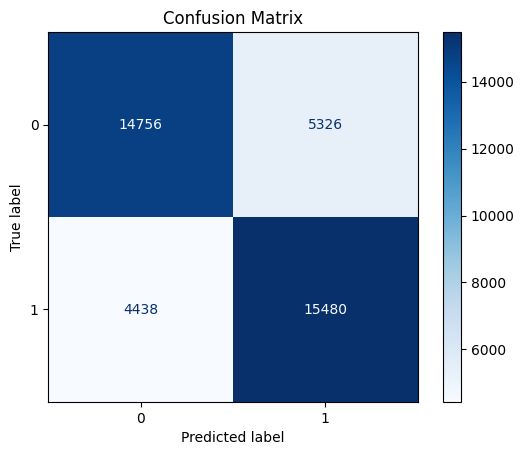

In [255]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, digits=4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
